# Homework 5 - Phys 434
## Andrew Spicciati
## 10/27/21

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import pandas as pd

plt.rcParams["figure.figsize"] = (10,7)


# Problem 1

In [2]:
x = np.linspace(-5,5,41)
bkgd = stats.norm.rvs(size=1000000,scale=2)
signal = stats.uniform.rvs(0,20,size=1000000)

In [3]:
np.mean(signal)

9.997752399136607

<ipython-input-4-5c17cc56f583>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

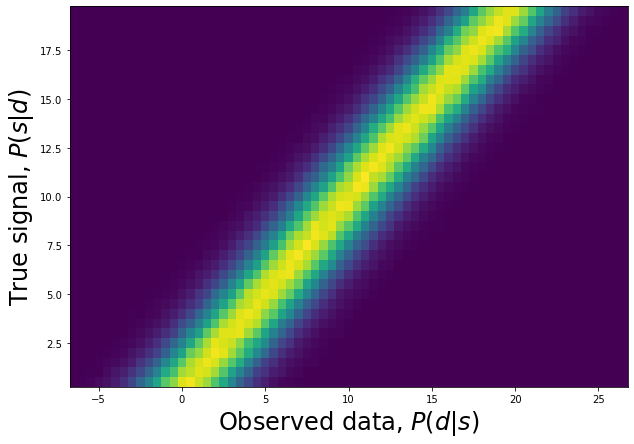

In [4]:
data = bkgd + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-7,27,69)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

# Problem 1b

In [5]:
#for a value of ~10
idx = np.argwhere(temp2==10)[0]

In [6]:
#the actual mean is 10
temp2[idx][0]

10.0

In [7]:
Psd.shape

(68, 40)

Text(0, 0.5, 'Probability')

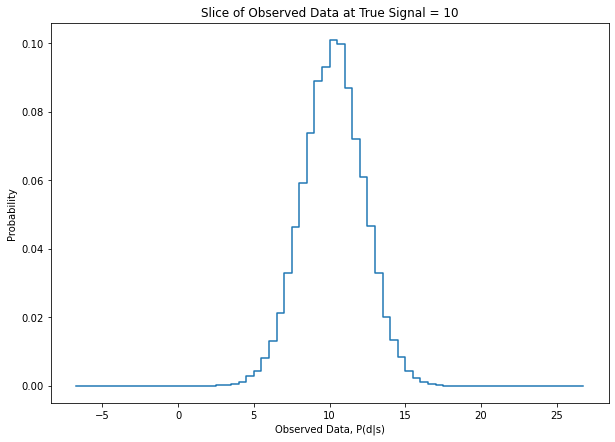

In [8]:
plt.step(datacenters,Psd[:,idx]*10,where='mid')
plt.title('Slice of Observed Data at True Signal = 10')
plt.xlabel('Observed Data, P(d|s)')
plt.ylabel('Probability')

Here I have plotted a slice of the observed data as a histogram for a true signal of 10. This means that if the true signal is 10, this is the range and distribution of values we would expect to observed. It is centered on 10, which makes sense -- meaning the most likely value of data we observe if the signal is at 10 would also be 10.

# Problem 1c

In [9]:
idx = np.argwhere(temp == 10)[0]
temp[idx][0]

10.0

In [10]:
sum(Psd[idx,:][0])

0.10042940601168414

Text(0, 0.5, 'Probability')

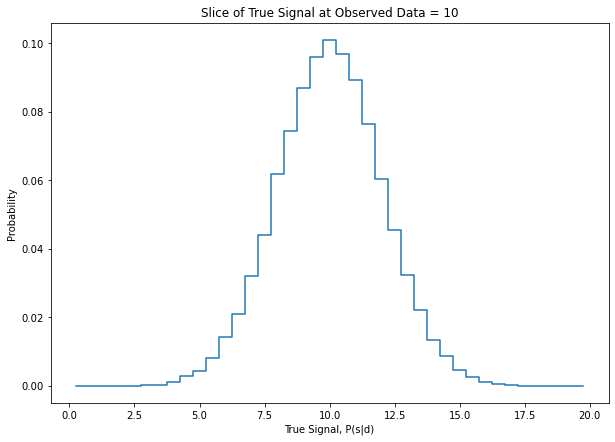

In [11]:
plt.step(signalcenters,Psd[idx,:][0]*10)
plt.title('Slice of True Signal at Observed Data = 10')
plt.xlabel('True Signal, P(s|d)')
plt.ylabel('Probability')

Here I have plotted a slice of the true signal for an observed data value of 10. So this is the range and distribution of actual signals if I were to observe a signal of 10. It is also centered on 10, so the most likely signal if I observe 10 is 10.

# Problem 2

In [12]:
x = np.linspace(-5,5,41)
bkgd = stats.norm.rvs(size=1000000,scale=2, loc=5)
signal = stats.uniform.rvs(0,20,size=1000000)

<ipython-input-13-5c17cc56f583>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

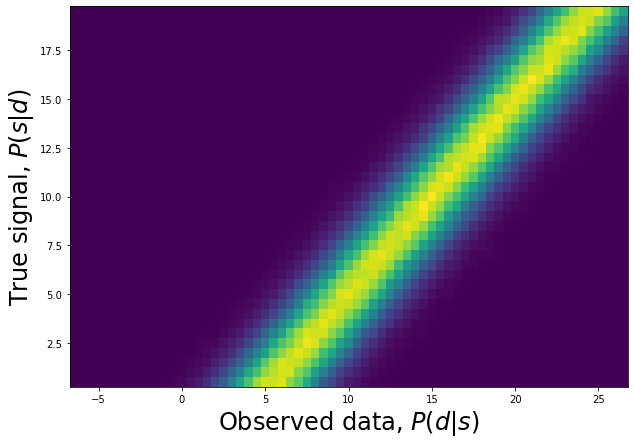

In [13]:
data = bkgd + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-7,27,69)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Text(0, 0.5, 'Probability')

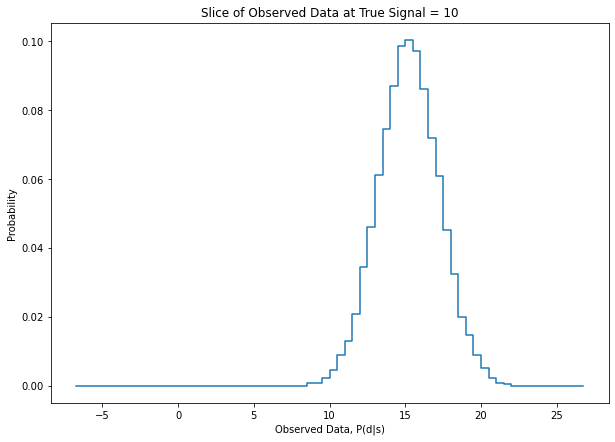

In [14]:
idx = np.argwhere(temp2==10)[0]
plt.step(datacenters,Psd[:,idx]*10,where='mid')
plt.title('Slice of Observed Data at True Signal = 10')
plt.xlabel('Observed Data, P(d|s)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

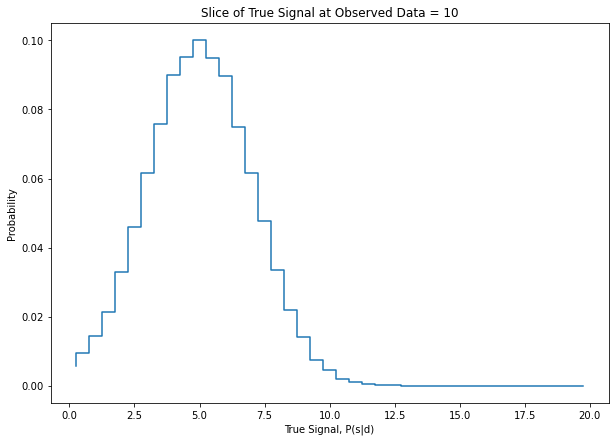

In [15]:
idx = np.argwhere(temp == 10)[0]
plt.step(signalcenters,Psd[idx,:][0]*10)
plt.title('Slice of True Signal at Observed Data = 10')
plt.xlabel('True Signal, P(s|d)')
plt.ylabel('Probability')

Now, because the mean of the background is 5, and true signal will have 5 added to it. This is why the plot of observed data for a signal of 10 actually has a mean of 15. For the same reason, if we observe a signal of 10, the true signal is most likely to be 5. 